In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import KID_S21 as S21
import pandas as pd
import glob 

import matplotlibcolors
plt.style.use('matplotlibrc')

%matplotlib widget

In [3]:
# dir = r'Z:\KIDonSun\experiments\Entropy ADR\LT361w2chip4trimmed_BF_20241105\S21\Power/'
# df = S21.loop_over_S21_files(dir, kid=None, pread=116)
# display(df)

c:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\NEW_S21_SCRIPT\KID_S21.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, new_entry], ignore_index=True)
c:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\NEW_S21_SCRIPT\KID_S21.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, new_entry], ignore_index=True)


,KID,Power,Temperature,f0,f0_std,Ql,Ql_std,Qc,Qc_std,Qi,Qi_std,Pint,redchisqr,phi
0,1,-116.0,0.099957,4.127921,1.456165e-07,38557.423091,97.252922,42140.669913,133.519310,453453.451452,15266.056092,-75.496353,0.000051,0.060622
1,2,-116.0,0.099950,4.173799,1.301561e-07,64626.518633,253.509016,74472.737595,340.577039,488808.321496,15250.742299,-73.483257,0.000057,-0.236893
2,3,-116.0,0.100028,4.179542,1.229827e-07,59838.269240,204.014353,67014.800633,277.437157,558772.680515,19719.919226,-73.693626,0.000047,-0.119563
3,4,-116.0,0.100026,4.191039,1.670762e-07,36117.945999,98.294311,39285.731553,139.375368,447921.712730,18066.858128,-75.759386,0.000048,0.011484
4,5,-116.0,0.100012,4.209545,1.161199e-07,65276.664060,228.040278,75062.168474,301.136843,500721.040839,13932.423574,-73.430551,0.000043,0.168581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,389,-116.0,0.099938,8.124056,5.564981e-07,41248.054016,211.626458,49107.610505,258.917911,257723.622659,7180.117565,-75.574917,0.000208,0.160386
389,390,-116.0,0.100000,8.134120,3.567341e-07,29028.488631,65.599659,30876.891307,94.319040,484910.295600,22146.765342,-76.611346,0.000068,-0.172533
390,391,-116.0,0.099962,8.145145,4.183335e-07,28523.833335,73.654463,31196.925137,94.177364,332893.876886,10092.925496,-76.808459,0.000080,-0.051004
391,392,-116.0,0.100010,8.159165,2.985051e-07,33644.622048,75.182173,35142.550354,124.139495,789328.714722,60640.095793,-75.891518,0.000063,-0.183940


In [2]:
def fit(x, a, b):
    return a*x**(-2)+b 

In [3]:
f0s = np.array(df['f0'])
Qs = np.array(df['Ql'])
Qis = np.array(df['Qi'])
Qcs = np.array(df['Qc'])
phi = np.array(df['phi'])
Q_master = np.stack((f0s, Qs, Qis, Qcs, phi), axis=1)
np.savetxt('LT361w2chip4nibbled_Qs.txt', Q_master, header='f0 Ql Qi Qc', fmt='%s', delimiter='\t')
min_df = 0.002
df0s = f0s[1:] - f0s[:-1]
df_mask = np.zeros(f0s.shape, dtype=bool)
too_close = df0s < min_df
too_close_mask = np.hstack((False, too_close)) + np.hstack((too_close, False))
print(np.sum(too_close_mask))
popt, pcov = curve_fit(fit, f0s[~too_close_mask], Qcs[~too_close_mask])
f0s_fit = np.linspace(f0s[~too_close_mask].min(), f0s[~too_close_mask].max(), 100)

fig, ax = plt.subplots()
ax.set_title('LT361w2chip4nibbled')
ax.set_yscale('log')
ax.scatter(f0s[~too_close_mask], Qs[~too_close_mask], label='Q')
ax.scatter(f0s[~too_close_mask], Qis[~too_close_mask], label='Qis')
ax.scatter(f0s[~too_close_mask], Qcs[~too_close_mask], label='Qcs')
# ax.plot(f0s_fit, fit(f0s_fit, *popt), label='fit $y=a/x^2 +b$', c='k', ls='--')
ax.set_xlim(4,9)
ax.set_xlabel('Frequency (GHz)')    
ax.set_ylim(1e4,2e6)
ax.set_ylabel('Q')
ax.legend()
print(*popt)

NameError: name 'df' is not defined

In [ ]:
couplers = np.load(r'C:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\Mappings\LT361w2chip9\LT361_4-8GHz_1024px_couplers.npy')
f0s_design = np.load(r'C:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\Mappings\LT361w2chip9\LT361_4-8GHz_1024px_F0s.npy')*1e-9
fig, ax = plt.subplots()
ax.scatter(f0s_design, couplers)
ax.set_xlim(4,9)
ax.set_xlabel('Frequency (GHz)')    
ax.set_ylim(0, 100)
ax.set_ylabel('Length coupler (um)')

In [13]:
master = np.loadtxt('LT361w2chip4_master.txt', skiprows=1, delimiter=',')
Qs = np.loadtxt('LT361w2chip4nibbled_Qs.txt', skiprows=1, delimiter='\t')
f0_mapped = master[:, 9]
f0_Q = Qs[:, 0]
Ql = Qs[:, 1]
Qc = Qs[:, 3]
Qi = Qs[:, 2]
phi = Qs[:, 4]

min_df = 0.001
df0s = f0_Q[1:] - f0_Q[:-1]
df_mask = np.zeros(f0_Q.shape, dtype=bool)
too_close = df0s < min_df
too_close_mask = np.hstack((False, too_close)) + np.hstack((too_close, False))

Qi_mask = (Qi > 1e5)  & (Qi < 2e6)
Qc_mask = Qc < 1.5e5
mask = Qi_mask & Qc_mask & ~too_close_mask

Qs[~mask] = np.nan
f0_Q = Qs[:, 0]
Ql = Qs[:, 1]
Qc = Qs[:, 3]
Qi = Qs[:, 2]
phi = Qs[:, 4]

In [15]:
nr = len(f0_mapped)
f0_dark = f0_Q
tones = np.empty(nr)
tones[:] = np.nan
Qs_sorted = np.empty((nr, 5))
Qs_sorted[:] = np.nan
idxs = np.empty(nr)
idxs[:] = np.nan
for id, f0 in enumerate(f0_mapped):
    if ~np.isnan(f0):
        closest =  np.nanargmin(np.abs(f0 - f0_dark))
        if ~np.isnan(f0_dark[closest]):
            tone = f0_dark[closest]
            Q = Qs[closest]
            if closest in idxs:
                idx_location = np.where(idxs == closest)[0]
                if len(idx_location) == 1:
                    prev_id = idx_location[0]
                    prev_f0 = f0_mapped[prev_id]
                    curr_diff = np.abs(f0 - tone)
                    prev_diff = np.abs(prev_f0 - tone)
                    if curr_diff < prev_diff:
                        tones[prev_id] = np.nan
                        Qs_sorted[prev_id] = np.nan
                        idxs[prev_id] = np.nan
                    else:
                        tone = np.nan
                        Q = np.nan
                        closest = np.nan
                else:
                    print('more than one match')
                    tone = np.nan
                    Q = np.nan
                    closest = np.nan
            else:
                pass
        else:
            tone = np.nan
            Q = np.nan
            closest = np.nan
    else:
        tone = np.nan
        Q = np.nan
        closest = np.nan
    tones[id] = tone
    Qs_sorted[id] = Q
    idxs[id] = closest

f0 = Qs_sorted[:, 0]
Ql = Qs_sorted[:, 1]
Qc = Qs_sorted[:, 3]
Qi = Qs_sorted[:, 2]
phi = Qs_sorted[:, 4]



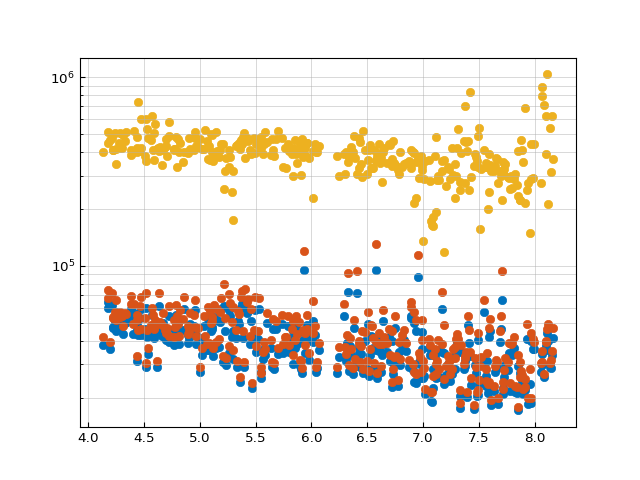

In [16]:
fig, ax = plt.subplots()
ax.scatter(f0, Ql)
ax.scatter(f0, Qc)
ax.scatter(f0, Qi)
ax.set_yscale('log')

In [17]:
headers = "idx,f0,Ql,Qi,Qc,phi,f0,Ql,Qi,Qc,phi"
array = np.zeros((len(f0_mapped), 11))
array[:, 0] = np.arange(len(f0_mapped))
array[:, 6:] = Qs_sorted
print(len(array), len(f0_mapped))
np.savetxt('LT361w2chip4_Q-master.txt', array, delimiter=',', header=headers)


400 400


(8.0, 8.1)

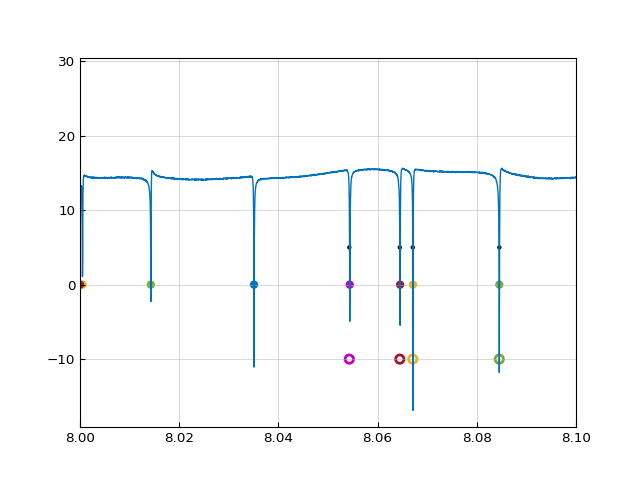

In [18]:
[dark_freqs, dark_s21] = np.load('LT361w2chip4nibbled.npy')
fig, ax = plt.subplots()
ax.plot(dark_freqs, dark_s21)
colors = ['r', 'g', 'b', 'c', 'm', 'y']
f0_Q = Qs[:, 0]
f0_corr = f0
ax.scatter(f0_Q, 5*np.ones(len(f0_Q)), facecolor='k', edgecolor='None', s=10, label='f0 mapped')
for idx, f in enumerate(f0_mapped):
    c= colors[idx%len(colors)]
    ax.scatter(f0_mapped[idx], 0, facecolor=c, edgecolor='none', linewidth=2)
    # ax.text(f0_mapped[idx], 0, str(idx), fontsize=8, color=c, ha='center', va='bottom')
    # ax.scatter(df_f0_Q[idx], -5, facecolor='None', edgecolor=c, linewidth=2)
    # ax.text(df_extended['f0_Q'][idx], -5, str(idx), fontsize=8, color=c, ha='center', va='bottom')
    ax.scatter(f0_corr[idx], -10, facecolor='None', edgecolor=c, linewidth=2)
    # ax.text(f0_corr[idx], -10, str(idx), fontsize=8, color=c, ha='center', va='bottom')
    # ax.scatter(f0_Q[idx], 0, facecolor=c, edgecolor='None')
ax.set_xlim((8, 8.1))

4.1279229464639 4.127929


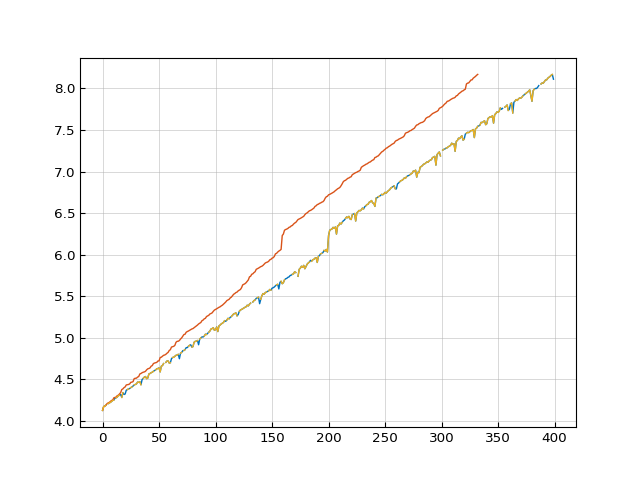

In [9]:
fig, ax = plt.subplots()
ax.plot(f0_mapped)
ax.plot(f0_Q)
ax.plot(tones)
print(f0_Q[0], f0_mapped[0])

In [11]:
def fit(x, a, b):
    return a*x**(-2)+b

0.3007647848130713


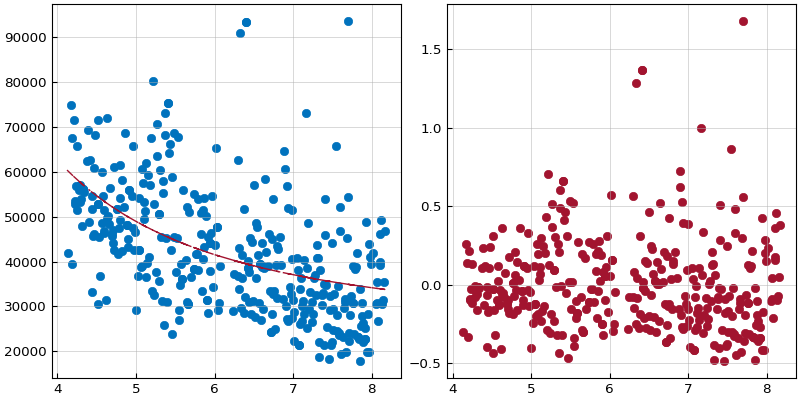

In [12]:
fig, ax = plt.subplot_mosaic('ab', figsize=(8, 4), layout='constrained')
nanmask = np.isnan(Qc)
popt, pcov = curve_fit(fit, f0[~nanmask], Qc[~nanmask])
ax['a'].scatter(f0, Qc, label='Ql')
ax['a'].plot(f0, fit(f0, *popt), label='Ql', c='r')
Qc_corr = (Qc - fit(f0, *popt))/fit(f0, *popt)
print(np.nanstd(Qc_corr))
ax['b'].scatter(f0, Qc_corr, label='Ql', c='r')

In [ ]:
kid_id_board = np.ones((20, 20), dtype=int)
kid_id_board[master[:,1].astype(int), master[:,2].astype(int)] = master[:,0]

fig, ax = plt.subplot_mosaic('ab', figsize=(12,5), constrained_layout=True) 
im = ax['a'].imshow(Qc_corr[kid_id_board], vmin=-0.5, vmax=.5, origin='lower')
# im = ax['a'].imshow(Ql[kid_id_board], vmin=1e4, vmax=7e4, origin='lower')
# im = ax['a'].imshow(Qi[kid_id_board], vmin=2e5, vmax=6e5, origin='lower')
fig.colorbar(im, ax=ax['a'])
im = ax['b'].imshow(np.rad2deg(phi)[kid_id_board], origin='lower', vmin=-30, vmax=30)
fig.colorbar(im, ax=ax['b'])

In [ ]:
phi